# Chapter 7 - Moving Beyond Linearity

#### Student ID:

#### Name:  

部分習題需要寫數學式。

若不想用打的，可用手寫後，進行拍照或掃描，並使用以下指令引入圖片。

請確認圖片清晰程度為可辨識。

`![title](test.png)`

### Q1: Polynomial Regression.

(a) Write the polynomial regression model $y_i = \beta_0 + \beta_1x_i + \beta_2x_i^2 + ... + \beta_mx_i^m + \epsilon_i\;(i=1,2,...,n)$ in matrix form.

> Ans:  
$$
\begin{pmatrix}
y_1 \\ y_2 \\ y_3 \\ \vdots \\ y_n
\end{pmatrix} = 
\begin{pmatrix}
1 & x_1 & ? & \dots & ? \\
1 & x_2 & ? & \dots & ? \\
1 & x_3 & ? & \dots & ? \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & ? & \dots & ? \\
\end{pmatrix}
\begin{pmatrix}
\beta_1 \\ \beta_2 \\ \beta_3 \\ \vdots \\ ?
\end{pmatrix}
+
\begin{pmatrix}
\epsilon_1 \\ \epsilon_2 \\ \epsilon_3 \\ \vdots \\ ?
\end{pmatrix}
$$

(b) The matrix expression in (a) can be written as $Y = X\mathbf{\beta} + \mathbf{\epsilon}$. What is the vector of estimated polynomial regression coefficients ($\hat{\beta}$) using ordinary least squares estimation?  
Write the answer in terms of $Y$ and $X$.

> Ans:  
$\hat{\beta}=$

Answer the following two questions using the variables `dis` (the weighted mean of distances to five Boston employment centers) and `nox` (nitrogen oxides concentration in parts per 10 million) from the `Boston` data. We will treat
`dis` as the predictor and `nox` as the response.

In [ ]:
# If you're using colab, run this block.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
Boston = pd.read_csv('/content/drive/MyDrive/Statistic Learning and Data Mining/Boston.csv', index_col=0)
dis = Boston.pop('dis')
nox = Boston.pop('nox')

In [ ]:
# If you're using Jupyter, run this block.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Boston = pd.read_csv('Boston.csv', index_col=0)
dis = Boston.pop('dis')
nox = Boston.pop('nox')

(c) Plot the polynomial fits using `sns.regplot` function (set `ax=ax` and `scatter=False`) with polynomial degrees (`order=n`) from 1 to 9, and report the associated residual sum of squares using `sm.OLS` and the `PolynomialFeatures` function.

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(12,12))
for i, axs in enumerate(axes):
    for j, ax in enumerate(axs):
        n = 1+j+3*i
        sns.scatterplot(x=dis, y=nox, color='tab:gray', alpha=0.2,ax=ax)
        # __________plot__________
        ax.set(title = 'Degree = ' + str(n))
        ax.axes.set_ylim(0.35,0.9)
        ssr = # __________ssr__________
        print('Degree', n, ':', ssr)

(d) Perform cross-validation or another approach to select the optimal
degree for the polynomial.
Describe your results.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

scores = []
fig, ax = plt.subplots(figsize=(6, 4))
for n in range(1,10):
  mse = # __________mse__________
  scores.append(mse)
plt.plot(range(1,10), scores, marker = 'o')
plt.plot(scores.index(min(scores))+1, min(scores), marker = 'o', markersize = 8, color = 'r')
ax.text(scores.index(min(scores))+1, min(scores)+0.1, round(min(scores), 6), size=12)
plt.xlabel('Degree')
plt.ylabel('10-CV error')

> Ans:  


### Q2: Regression Splines.

A cubic regression spline with one knot at $\xi$ can be obtained using a basis of the form $x$, $x^2$, $x^3$, $(x − \xi)_+^3$, where $(x − \xi)_+^3 = (x − \xi)^3$ if $x > \xi$ and equals 0 otherwise. We will now show that a function of the form
$$f(x)=\beta_0+\beta_1x+\beta_2x^2+\beta_3x^3+\beta_4 (x − \xi)_+^3$$
is indeed a cubic regression spline, regardless of the values of $\beta_0$, $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$.

(a) Find a cubic polynomial
$$f_1(x)=a_1+b_1x+c_1x^2+d_1x^3$$
such that $f(x)=f_1(x)$ for all $x\leq \xi$. Express $a_1$, $b_1$, $c_1$, $d_1$ in terms of $\beta_0$, $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$.

> Ans:  
$(a_1, b_1, c_1, d_1)=(?, ?, ?, ?)$

(b) Find a cubic polynomial
$$f_2(x)=a_2+b_2x+c_2x^2+d_2x^3$$
such that $f(x)=f_2(x)$ for all $x> \xi$. Express $a_2$, $b_2$, $c_2$, $d_2$ in terms of $\beta_0$, $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$. We have now establised that $f(x)$ is a piecewise polynomial.

> Ans:  
$(a_2, b_2, c_2, d_2)=(?, ?, ?, ?)$

(c) Show that $f_1(\xi) = f_2(\xi)$. That is, $f(x)$ is continuous at $\xi$.

> Ans:  


(d) Show that $f'_1(\xi) = f'_2(\xi)$. That is, $f'(x)$ is continuous at $\xi$.

> Ans:  


(e) Show that $f''_1(\xi) = f''_2(\xi)$. That is, $f''(x)$ is continuous at $\xi$.

> Ans:  


(f) Use the `dmatix` to transform the `x` and fit a regression spline to predict `nox` using `dis` for a range of degrees of freedom. Plot the resulting fits and report the resulting RSS.

In [ ]:
import statsmodels.api as sm
from patsy import dmatrix

fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10,10))
for i, axs in enumerate(axes):
    for j, ax in enumerate(axs):
        n = 3+j+3*i
        transformed_x = # __________dmatrix__________
        result = sm.OLS(nox, transformed_x).fit()
        y_hat = result.predict(transformed_x)
        predictions = result.get_prediction()
        df_predictions = predictions.summary_frame()
        sns.scatterplot(x=dis, y=nox, color='tab:gray', alpha=0.2, ax=ax,)
        sns.lineplot(x=dis, y=y_hat, color='blue', ax=ax)
        sns.lineplot(x=dis, y=df_predictions.mean_ci_lower, color='blue', linestyle='--', ax=ax)
        sns.lineplot(x=dis, y=df_predictions.mean_ci_upper, color='blue', linestyle='--', ax=ax)
        ax.set(title = 'Degree of freedom = ' + str(n))
        ax.axes.set_ylim(0.35,0.9)
        print('Degree of freedom =', n, ':', result.ssr)

(g) Perform cross-validation or another approach in order to select
the best degrees of freedom for a regression spline on this data.
Describe your results.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from patsy import dmatrix

scores=[]
for n in range(3,13):
    transformed_x = # __________dmatrix__________
    lm = LinearRegression()
    scores.append(cross_val_score(lm, transformed_x, nox, cv=10, scoring=make_scorer(mean_squared_error)).mean())
sns.lineplot(x=range(3,13), y=scores)

> Ans:  


### Q3: Local regression.

Use the `sm.nonparametric.lowess` function to fit a locally weighted scatterplot smoothing and predict `nox` using `dis` with fraction (`frac`) from `1/10` to `10/10`. Plot the resulting fits and report the resulting RSS.

In [ ]:
import statsmodels.api as sm

fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10,10))
for i, axs in enumerate(axes):
    for j, ax in enumerate(axs):
        n = 1+j+3*i
        y_hat = # _________lowess_________
        sns.scatterplot(x=dis, y=nox, color='tab:gray', alpha=0.2, ax=ax,)
        sns.lineplot(x=dis, y=y_hat, color='blue', ax=ax)
        ax.set(title = 'Degree of freedom = ' + str(n))
        ax.axes.set_ylim(0.35,0.9)
        print('Degree of freedom =', n, ':', sum((nox-y_hat)**2))

### Q4: Smoothing function.

Suppose that a curve $\hat{g}$ is computed to smoothly fit a set of n points
using the following formula:
$$\hat{g}=\text{arg min}_g\left(\sum_{i=1}^n (y_i-g(x_i))^2+\lambda \int \left[g^{(m)}(x)\right]^2\ dx\right),$$
where $g^{(m)}$ represents the $m$th derivative of $g$ (and $g^{(0)} = g$). Provide example sketches of $\hat{g}$ in each of the following scenarios.

(Following blocks give out an univariate example for $x$ and $y$, since this problem is kind of abstract. For answering following question, consider the function $g$ to be a polynomial function will make the problem easier, and the polynomial function can be implement by `np.polyval` and `np.polyfit`. 也就是說，這題有點抽象。如果不附上實際資料，就算回答出這題也不知道題幹再問啥觀念。所以這題附上點和底下的那些畫圖的 block 來讓大家比較好知道這題在搞啥。)

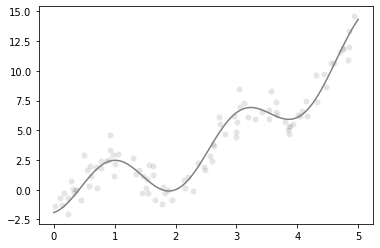

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
line = np.linspace(0,5,100)
X = np.random.uniform(0,5,size=100)
eps = np.random.normal(0,1,100)
g = lambda x: 2*np.sin(3*x+5)+0.5*x**2
Y = g(X)+eps
sns.scatterplot(x=X, y=Y,  color='tab:gray', alpha=0.2)
sns.lineplot(x=line, y=g(line), color='gray')

(example) $\lambda=\infty,\ m =0$

> Ans:  
If we expect $\hat{g}$ to reach minimum under $\lambda=\infty$, $g^0(x)$ would be constrained to 0.  
Therefore, $\hat{g}(x)=0$.

In [5]:
g_hat = np.zeros_like(line)

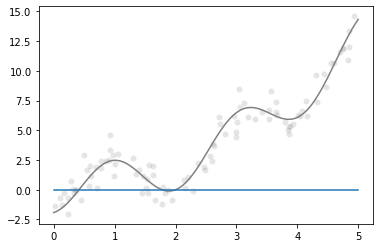

In [6]:
sns.scatterplot(x=X, y=Y,  color='tab:gray', alpha=0.2)
sns.lineplot(x=line, y=g(line), color='gray')
sns.lineplot(x=line, y=g_hat)

(a) $\lambda=\infty,\ m =1$

> Ans:  


In [ ]:
g_hat = # _________g_hat_________

In [ ]:
sns.scatterplot(x=X, y=Y,  color='tab:gray', alpha=0.2)
sns.lineplot(x=line, y=g(line), color='gray')
sns.lineplot(x=line, y=g_hat)

(b) $\lambda=\infty,\ m =2$

> Ans:  


In [ ]:
g_hat = # _________g_hat_________

In [ ]:
sns.scatterplot(x=X, y=Y,  color='tab:gray', alpha=0.2)
sns.lineplot(x=line, y=g(line), color='gray')
sns.lineplot(x=line, y=g_hat)

(c) $\lambda=\infty,\ m =3$

> Ans:  


In [ ]:
g_hat = # _________g_hat_________

In [ ]:
sns.scatterplot(x=X, y=Y,  color='tab:gray', alpha=0.2)
sns.lineplot(x=line, y=g(line), color='gray')
sns.lineplot(x=line, y=g_hat)

(d) $\lambda=0,\ m =3$

> Ans:  


In [ ]:
g_hat = # _________g_hat_________

In [ ]:
sns.scatterplot(x=X, y=Y,  color='tab:gray', alpha=0.2)
sns.lineplot(x=line, y=g(line), color='gray')
sns.lineplot(x=line, y=g_hat)

(e) Which of the parameter control the flexibility, $\lambda$ or $m$? Which of the parameter control the smoothness, $\lambda$ or $m$?

> Ans:  
control the flexibility:  
control the smoothness:  



---

